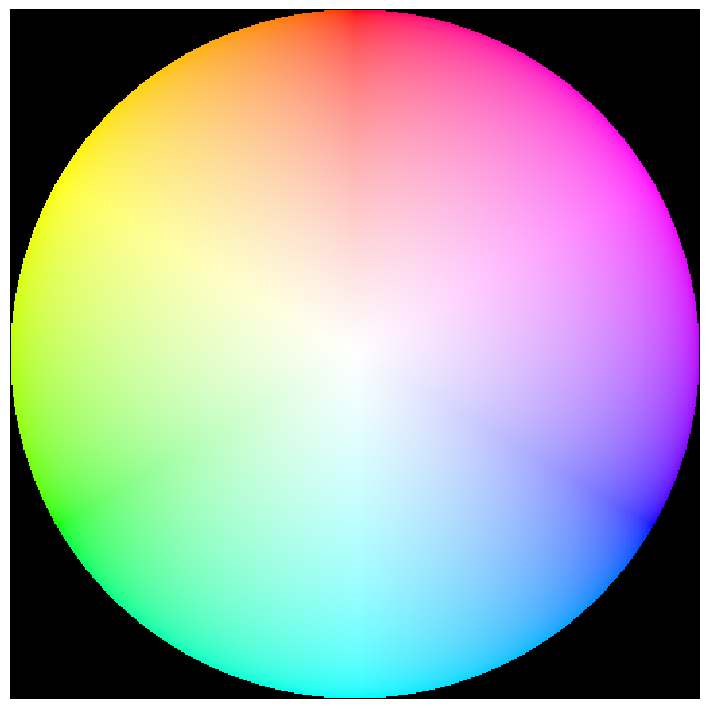

In [2]:
import colour
import numpy as np


def colour_wheel(samples=512, clip_circle=True, method='Colour'):
    xx, yy = np.meshgrid(
        np.linspace(-1, 1, samples), np.linspace(-1, 1, samples))

    S = np.sqrt(xx ** 2 + yy ** 2)
    H = (np.arctan2(xx, yy) + np.pi) / (np.pi * 2)

    HSV = colour.utilities.tstack([H, S, np.ones(H.shape)])
    RGB = colour.HSV_to_RGB(HSV)

    if clip_circle:
        RGB[S > 1] = 0

    if method.lower()== 'nuke':
        RGB = colour.utilities.orient(RGB, 'Flip')
        RGB = colour.utilities.orient(RGB, '90 CW')

    return RGB


colour.plotting.plot_image(colour.cctf_encoding(colour_wheel()));

array([ 0.25320721,  0.4568865 ,  0.24452135])

In [26]:
import matplotlib.pyplot as plt

values = [.51, -.15, .10]
rgb = colour.XYZ_to_sRGB(colour.Oklab_to_XYZ(values))

fig, ax = plt.subplots()
ax.scatter(x=[0], y=[0], s=1000, color=rgb)
plt.show()

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

In [28]:
values = [1, 0, 0]
rgb = colour.XYZ_to_sRGB(colour.Oklab_to_XYZ(values))
rgb # Need to write code it see if it failed

array([ 1.00011723,  1.00002378,  0.99968101])

In [34]:
colour.convert([1, 0, 0], 'Oklab', 'Hexadecimal')

'#fefefe'

In [33]:
colour.convert?

Signature: colour.convert(a: 'Any', source: 'str', target: 'str', **kwargs: 'Any') -> 'Any'
Docstring:
Convert given object :math:`a` from source colour representation to target
colour representation using the automatic colour conversion graph.

The conversion is performed by finding the shortest path in a
`NetworkX <https://networkx.github.io>`__ :class:`DiGraph` class instance.

The conversion path adopts the **'1'** domain-range scale and the object
:math:`a` is expected to be *soft* normalised accordingly. For example,
*CIE XYZ* tristimulus values arguments for use with the *CAM16* colour
appearance model should be in domain `[0, 1]` instead of the domain
`[0, 100]` used with the **'Reference'** domain-range scale. The arguments
are typically converted as follows:

-   *Scalars* in domain-range `[0, 10]`, e.g *Munsell Value* are
    scaled by *10*.
-   *Percentages* in domain-range `[0, 100]` are scaled by *100*.
-   *Degrees* in domain-range `[0, 360]` are scaled by *360*.
-   *In